In [228]:
#import data from github
!wget https://raw.githubusercontent.com/Xinzhujia/maggie/master/test%20copy.csv
!wget https://raw.githubusercontent.com/Xinzhujia/maggie/master/train.csv

--2019-12-13 18:08:52--  https://raw.githubusercontent.com/Xinzhujia/maggie/master/test%20copy.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15909948 (15M) [text/plain]
Saving to: ‘test copy.csv.1’

test copy.csv.1     100%[===================>]  15.17M  94.9MB/s    in 0.2s    

2019-12-13 18:08:52 (94.9 MB/s) - ‘test copy.csv.1’ saved [15909948/15909948]

--2019-12-13 18:08:53--  https://raw.githubusercontent.com/Xinzhujia/maggie/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9387949 (9.0M) [text/plain]
Saving to: ‘

In [0]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [230]:
# transfer csv files to pandas DataFrame
train = pd.read_csv('train.csv')
train.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8,NaN,75751,0.2254,11.0,NaN,NaN,0.49,5.0,1.842984,27.053679,1.0,NaN,NaN,-0.925463,2.0,NaN,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,NaN,-0.000156,...,-0.000842,-0.001390,0.000148,2.846940e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501970e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953220e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.966,1564384.957
1,2,NaN,NaN,NaN,NaN,3,0.388896,17369,0.0166,13.0,NaN,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-0.000009,-0.000248,...,-0.000104,0.000555,0.000259,2.560000e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.880000e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.320000e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349,2167437.936
2,3,NaN,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.0,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,NaN,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-0.000930,-0.000543,...,-0.000003,-0.000102,-0.000292,5.032660e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136850e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322560e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383,1911496.729
3,4,NaN,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.0,-2.138383,0.00,6.0,NaN,1.801865,1.0,-1.131213,1.565036,NaN,7.0,1.148738,-2.440799,1.551425,-1.788725,NaN,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,-0.000639,0.000420,0.000145,-0.000130,...,0.000120,-0.000119,0.000285,-1.020000e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739540e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281100e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.424,2139461.780
4,5,6.0,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.0,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,0.001226,0.001213,-0.002428,0.000974,...,-0.000979,0.000978,-0.000014,-1.218838e-03,0.001208,-0.000013,-0.000620,0.000606,-0.001238,0.000002,0.000003,-0.001226,0.001005,-0.000008,0.000231,-0.000006,-0.001212,0.00

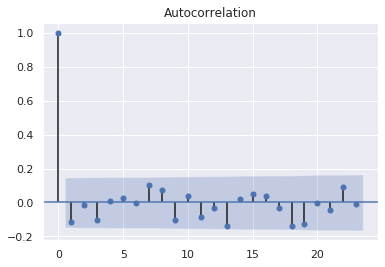

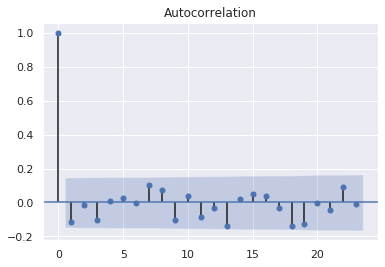

In [231]:
returns = train.loc[:,'Ret_2':'Ret_180']
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(returns.loc[50].values)

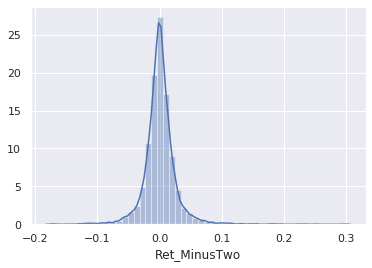

In [232]:
ax = sns.distplot(train["Ret_MinusTwo"])

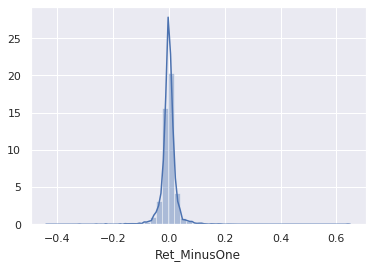

In [233]:
ax = sns.distplot(train["Ret_MinusOne"])

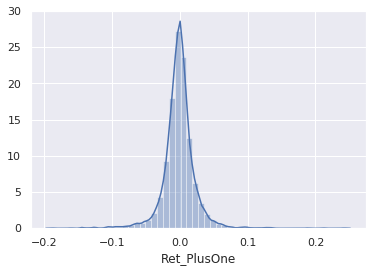

In [234]:
ax = sns.distplot(train["Ret_PlusOne"])

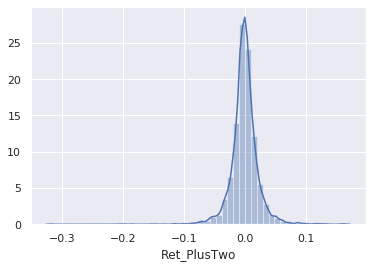

In [235]:
ax = sns.distplot(train["Ret_PlusTwo"])

In [236]:
test = pd.read_csv('test copy.csv')
test.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_81,Ret_82,Ret_83,Ret_84,Ret_85,Ret_86,Ret_87,Ret_88,Ret_89,Ret_90,Ret_91,Ret_92,Ret_93,Ret_94,Ret_95,Ret_96,Ret_97,Ret_98,Ret_99,Ret_100,Ret_101,Ret_102,Ret_103,Ret_104,Ret_105,Ret_106,Ret_107,Ret_108,Ret_109,Ret_110,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1,1.0,1.412783,-0.056284,NaN,10,0.413226,18871,0.2138,11.0,NaN,-0.229910,0.97,8.0,1.683134,12.513327,1.0,-0.145889,0.162457,-0.650406,7.0,NaN,-0.709206,-4.106617,-0.556802,-0.401189,-0.017882,0.031248,0.000190,-0.000193,-0.000380,-0.000728,0.000003,-0.000369,0.000017,-0.000378,-0.000208,-0.000925,0.000566,NaN,...,0.000201,0.000929,-0.000016,NaN,1.098055e-03,-0.000188,-0.000012,0.001477,0.000931,0.000370,-0.000006,0.000191,0.000386,-0.000167,-0.000193,-0.000173,NaN,0.000194,0.000382,0.000006,0.002411,NaN,0.000552,NaN,0.001313,0.000758,0.000376,-0.000193,NaN,NaN,0.000370,-0.000762,NaN,0.000366,-0.002444,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,2,NaN,NaN,0.907973,1.002425,7,-0.257825,5852,0.2138,13.0,4.0,-0.971909,0.93,4.0,1.395301,13.225147,1.0,-0.569275,0.378955,-1.192782,9.0,-0.085532,-1.812607,0.997244,-1.533825,-0.689509,0.013274,0.013914,0.000912,0.000893,-0.000458,0.000000,-0.001848,0.000468,0.000930,-0.000433,0.001382,0.000011,-0.000447,-0.000898,...,-0.000001,0.000439,-0.000004,-0.000909,-4.469110e-04,-0.000003,-0.000473,-0.000469,-0.000450,0.000469,-0.000933,-0.000914,-0.000464,0.000451,-0.001367,0.000457,9.067530e-04,0.000458,-0.001001,0.000100,0.000901,0.000001,0.000011,-0.000014,-0.000459,0.000890,-0.000453,0.000461,0.000437,-0.000016,0.000457,0.000003,-0.000007,-0.000003,-0.000013,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,3,NaN,-0.607583,1.076668,0.517865,5,0.947340,76935,0.0105,10.0,NaN,-1.096276,0.88,4.0,1.722474,0.227258,1.0,-0.530189,0.349146,-0.876513,5.0,0.956571,NaN,1.240156,-1.886371,-0.293317,-0.046656,-0.021941,0.001570,-0.000697,0.000356,-0.000339,0.000522,-0.000005,0.000005,0.000343,0.000012,0.000008,0.000512,NaN,...,-0.000001,-0.000006,-0.000170,-0.000360,-8.340000e-06,0.000177,0.000012,-0.000014,-0.000018,0.000351,-0.000695,-0.000019,0.000709,-0.000729,0.000695,0.000190,1.791500e-04,-0.000189,-0.000009,0.000351,0.000012,-0.000188,NaN,NaN,-0.001045,0.000344,-0.000356,-0.000007,0.000193,-0.000343,0.000003,0.000157,-0.000181,0.000003,NaN,0.000164,0.000353,0.000704,-0.000168,-0.000006
3,4,NaN,2.230240,0.223222,NaN,1,NaN,84573,0.3318,13.0,NaN,-0.509942,0.76,5.0,1.805385,0.632670,1.0,-0.675101,0.743095,-1.033797,6.0,0.379218,0.364258,0.763514,-0.749919,-0.781445,-0.005580,0.005963,0.000152,0.000312,0.000015,-0.000340,-0.000016,NaN,0.000152,-0.000008,0.000453,-0.000328,NaN,0.000153,...,-0.000450,0.000762,0.000168,0.000025,4.418940e-04,-0.000610,0.000278,-0.000003,0.000759,0.000180,-0.000164,-0.000313,-0.000007,-0.000924,-0.000286,0.000623,-7.488280e-04,0.000315,0.000464,0.001218,0.000635,0.000779,0.000152,0.000620,-0.000141,0.000313,0.001386,0.000000,0.000000,0.000467,0.000010,-0.000792,-0.000479,0.000017,0.000170,-0.001079,0.000320,0.000006,0.001392,-0.001850
4,5,NaN,0.360399,0.597896,-0.145497,10,0.275744,89615,0.0099,8.0,5.0,-1.188949,0.64,4.0,1.528518,0.742222,1.0,-0.908404,0.935393,-1.233494,8.0,0.390292,-1.056964,1.075145,-1.683887,2.341882,0.000593,-0.012492,0.000257,-0.000198,-0.000072,0.000247,-0.000165,-0.000077,-0.000251,-0.000251,-0.000012,0.000240,0.000003,-0.000039,...,0.000092,-0.000128,-0.000247,-0.000482,-3.580000e-08,0.000087,0.000350,0.000017,-0.000481,-0.000727,0.000360,0.000085,-0.000214,-0.000010,0.000014,-0.000003,-1.640000e-09,-0.000003,0.000009,0.000017,0.000752,-0.000248,-0.000421,-0.000007,0.000227,

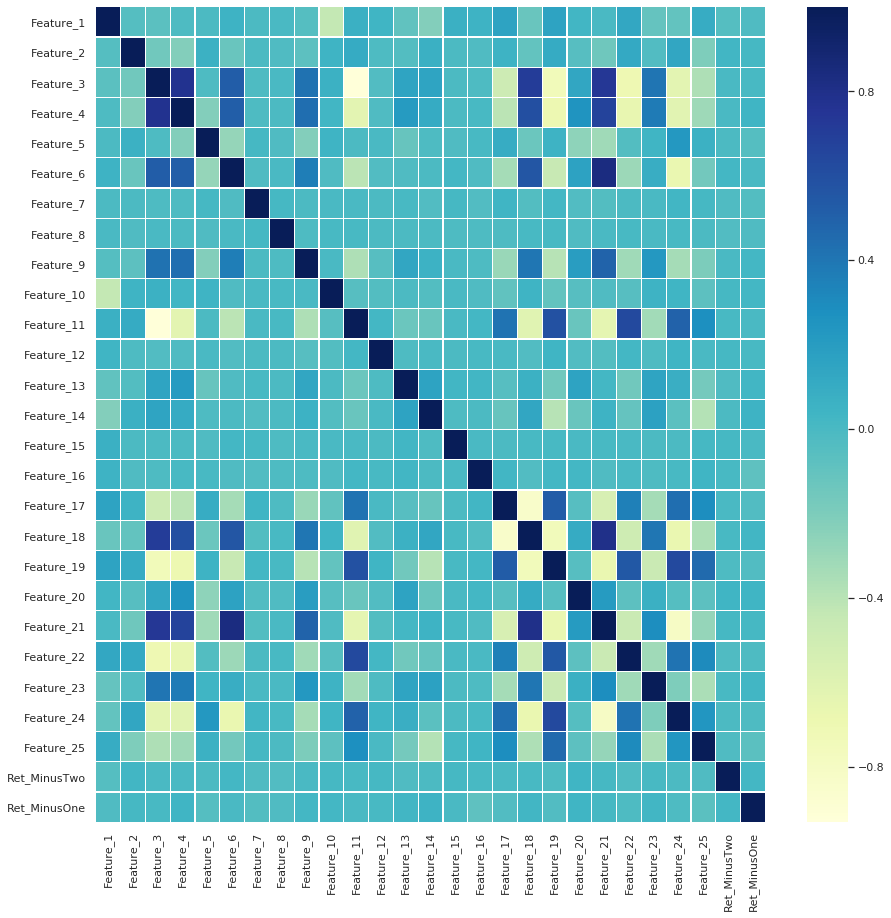

In [237]:
# select a dataframe with feature and Return from the close of trading on day 1 and 2 and find the correlation among those variables.
FeaRet_train = train.iloc[:,1:28]

corrmat = FeaRet_train.corr() 
f, ax = plt.subplots(figsize =(15, 15)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [0]:
# fill null with the mean of their respective columns
FeaRet_train.fillna(FeaRet_train.mean(), inplace=True)

In [239]:
FeaRet_train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne
0,3.441894,-0.089353,0.561741,0.407893,8,0.407533,75751,0.2254,11.0,4.720217,-0.576422,0.49,5.0,1.842984,27.053679,1.0,-0.560232,0.809302,-0.925463,2.0,0.604703,-0.489492,0.849677,-1.181054,-0.329859,0.055275,-0.010770
1,3.441894,-0.089353,0.561741,0.407893,3,0.388896,17369,0.0166,13.0,4.720217,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987
2,3.441894,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.604703,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181
3,3.441894,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.590716,1.801865,1.0,-1.131213,1.565036,-1.211173,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329859,0.000984,0.014106
4,6.000000,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065


In [240]:
# select X, y to do train test split
X = FeaRet_train.iloc[:,0:25]
y = FeaRet_train.iloc[:,25:26]
X

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,3.441894,-0.089353,0.561741,0.407893,8,0.407533,75751,0.2254,11.0,4.720217,-0.576422,0.49,5.0,1.842984,27.053679,1.0,-0.560232,0.809302,-0.925463,2.00000,0.604703,-0.489492,0.849677,-1.181054,-0.329859
1,3.441894,-0.089353,0.561741,0.407893,3,0.388896,17369,0.0166,13.0,4.720217,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.00000,0.886205,-0.151805,1.239856,0.953424,-0.709462
2,3.441894,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.00000,0.604703,0.389061,1.728096,-1.798090,-1.019370
3,3.441894,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.590716,1.801865,1.0,-1.131213,1.565036,-1.211173,7.00000,1.148738,-2.440799,1.551425,-1.788725,-0.329859
4,6.000000,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.00000,3.381040,1.732708,1.965189,-5.993092,3.219820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3.441894,-0.089353,-0.299754,-0.082292,8,-0.137034,41965,0.2208,10.0,5.000000,0.433223,0.91,1.0,1.460299,0.159603,1.0,-0.560968,0.407228,-1.237017,4.00000,-0.102999,0.631987,0.743592,-2.117394,-0.329859
3996,1.000000,-0.440641,0.276001,0.136510,5,-0.428369,64710,0.2254,13.0,4.720217,-0.465143,0.98,7.0,1.610795,0.061588,1.0,-0.209307,0.226581,-0.476176,5.00000,-0.392544,-1.067290,0.598727,1.100210,-0.389838
3997,3.441894,0.129069,-0.587953,-0.423308,8,-0.212232,21016,0.2208,10.0,1.000000,0.719822,0.26,3.0,1.050614,0.529012,1.0,-0.045071,-0.056054,-0.088553,5.32538,-0.627498,0.946760,0.104026,-0.854662,0.112451
3998,2.000000,2.305421,1.633715,0.407893,7,0.831304,30508,0.0098,11.0,4.720217,-2.329653,0.03,2.0,1.900209,0.451357,1.0,-1.603714,2.921632,-2.308781,9.00000,1.881815,-3.012132,1.966611,-2.239137,-1.111215


In [0]:
# train test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=99)

In [242]:
# import LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lm = LinearRegression()
lm.fit( train_X, train_y )
y_pred = lm.predict(test_X)

#calculate r2_train
rmse = sqrt(mean_squared_error(test_y, y_pred))
rmse

0.028507919303904523

In [243]:
#Feature Selection, RandomForest

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=99)
model = forest.fit(train_X, train_y) 
importances = forest.feature_importances_

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(forest, prefit=True, max_features=12)
feature_idx = model.get_support()
feature_names = X.columns[feature_idx]
X_NEW = model.transform(X)
X2 = pd.DataFrame(X_NEW, columns= feature_names)
X2

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,Feature_2,Feature_4,Feature_6,Feature_7,Feature_8,Feature_13,Feature_14,Feature_15,Feature_19,Feature_21,Feature_24,Feature_25
0,-0.089353,0.407893,0.407533,75751.0,0.2254,5.0,1.842984,27.053679,-0.925463,0.604703,-1.181054,-0.329859
1,-0.089353,0.407893,0.388896,17369.0,0.0166,9.0,1.577586,9.546915,-0.897067,0.886205,0.953424,-0.709462
2,-0.696727,-0.167928,0.471947,8277.0,0.3650,6.0,1.871160,9.647559,-1.603488,0.604703,-1.798090,-1.019370
3,-0.694350,0.479073,0.120653,22508.0,0.2654,6.0,1.590716,1.801865,-1.211173,1.148738,-1.788725,-0.329859
4,-1.736489,1.245280,4.866985,22423.0,0.2138,5.0,0.842102,9.198895,-1.102189,3.381040,-5.993092,3.219820
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.089353,-0.082292,-0.137034,41965.0,0.2208,1.0,1.460299,0.159603,-1.237017,-0.102999,-2.117394,-0.329859
3996,-0.440641,0.136510,-0.428369,64710.0,0.2254,7.0,1.610795,0.061588,-0.476176,-0.392544,1.100210,-0.389838
3997,0.129069,-0.423308,-0.212232,21016.0,0.2208,3.0,1.050614,0.529012,-0.088553,-0.627498,-0.854662,0.112451
3998,2.305421,0.407893,0.831304,30508.0,0.0098,2.0,1.900209,0.451357,-2.308781,1.881815,-2.239137,-1.111215


In [244]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(train_X.columns, importances), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))


name             score
Feature_19  0.0725204
Feature_14  0.0638664
Feature_6   0.0580905
Feature_21  0.0540569
Feature_25  0.0517475
Feature_7   0.0508175
Feature_4   0.050659
Feature_24  0.0476416
Feature_8   0.0468301
Feature_15  0.0452789
Feature_2   0.043485
Feature_13  0.0419765
Feature_20  0.0412429
Feature_12  0.0384976
Feature_22  0.0384888
Feature_3   0.0362648
Feature_17  0.0358526
Feature_23  0.0347485
Feature_11  0.0321055
Feature_18  0.0299042
Feature_5   0.0289983
Feature_9   0.0257704
Feature_10  0.0174431
Feature_1   0.0110876
Feature_16  0.00262553


In [245]:
#train test split
train_X2, test_X2, train_y2, test_y2  = train_test_split(X2, y, test_size=0.5, random_state=99)

# import LinearRegression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( train_X2, train_y2 )

y_pred2 = lm.predict(test_X2)

#calculate r2_train
rmse = sqrt(mean_squared_error(test_y2, y_pred2))
rmse

0.02843243507037285

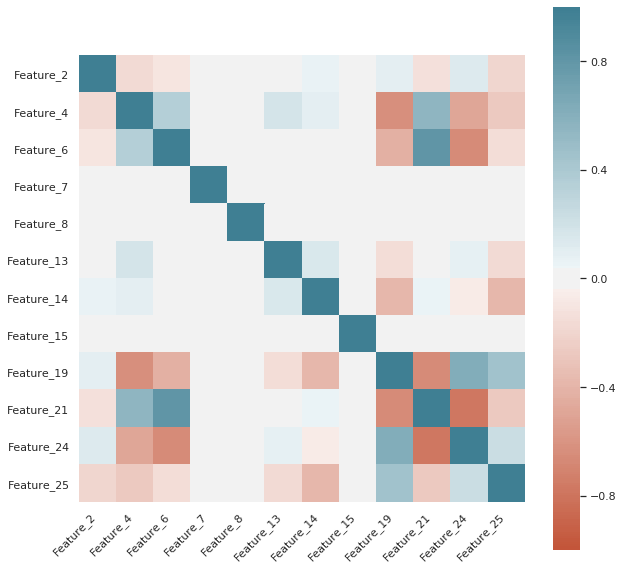

In [246]:
# find the relevance of different independent variables in new dataset X2. Calculate column correlations and make a seaborn heatmap

corr = X2.corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
# import Lasso and Ridge model and find rmse using original dataset 
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [0]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

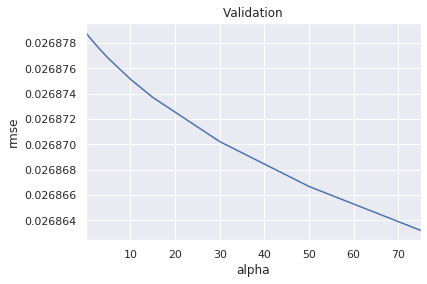

In [265]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")  

In [250]:
# get rmse from ridge regression
cv_ridge.min()

0.02686319087457803

In [266]:
# Lasso model
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [267]:
# get rmsle from lasso regression
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this 

0.02680388237357384

In [0]:
model_lasso.predict(X)

In [0]:
Y = y['Ret_MinusTwo'].to_numpy()

In [0]:
# import Lasso and Ridge model using dataset after feature selection
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X2, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [0]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

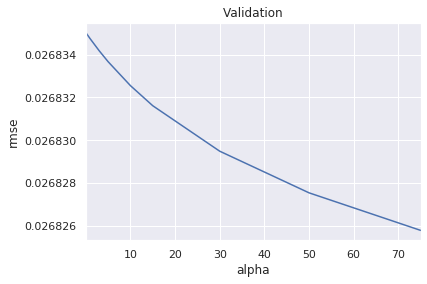

In [257]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [258]:
# get rmse from ridge regression
cv_ridge.min()

0.026825794436768864

In [259]:
# Lasso model
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X2, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [260]:
# get rmsle from lasso regression
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this 

0.026808611608802234